In [342]:
import geopandas as gpd
import pandas as pd

In [343]:
# read file
fp = r'data\Estonia_emigration_toFinland_2004-2019.csv'
es_data = pd.read_csv(fp, sep=',', skiprows=1)

es_data.head(12)

,Year,Indicator,County,Finland
0,2004,Emigrants,Whole country,1960
1,2004,Emigrants,Harju county,647
2,2004,Emigrants,..Tallinn,502
3,2004,Emigrants,Hiiu county,15
4,2004,Emigrants,Ida-Viru county,189
5,2004,Emigrants,Jõgeva county,75
6,2004,Emigrants,Järva county,103
7,2004,Emigrants,Lääne county,39
8,2004,Emigrants,Lääne-Viru county,136
9,2004,Emigrants,Põlva county,22


In [344]:
# creating a similar name to join with Shapefile
es_data['name']= es_data['County']
es_data['name'] = es_data['name'].replace(to_replace='county',  value='maakond', regex=True)
es_data.head(12)

,Year,Indicator,County,Finland,name
0,2004,Emigrants,Whole country,1960,Whole country
1,2004,Emigrants,Harju county,647,Harju maakond
2,2004,Emigrants,..Tallinn,502,..Tallinn
3,2004,Emigrants,Hiiu county,15,Hiiu maakond
4,2004,Emigrants,Ida-Viru county,189,Ida-Viru maakond
5,2004,Emigrants,Jõgeva county,75,Jõgeva maakond
6,2004,Emigrants,Järva county,103,Järva maakond
7,2004,Emigrants,Lääne county,39,Lääne maakond
8,2004,Emigrants,Lääne-Viru county,136,Lääne-Viru maakond
9,2004,Emigrants,Põlva county,22,Põlva maakond


In [345]:
# erasing rows with non county data
es_data = es_data.loc[es_data['name']!='Whole country']
es_data = es_data.loc[es_data['name']!='..Tallinn']
es_data = es_data.loc[es_data['name']!='Unknown County']

print(es_data['name'].nunique(), 'counties')
es_data.head()

15 counties


,Year,Indicator,County,Finland,name
1,2004,Emigrants,Harju county,647,Harju maakond
3,2004,Emigrants,Hiiu county,15,Hiiu maakond
4,2004,Emigrants,Ida-Viru county,189,Ida-Viru maakond
5,2004,Emigrants,Jõgeva county,75,Jõgeva maakond
6,2004,Emigrants,Järva county,103,Järva maakond


In [346]:
# grouped by name
grouped=es_data.groupby('name')

# new dataframe
emig_data = pd.DataFrame()

# iterating over groups
for key, group in grouped:
    
    # adding the name of the county
    emig_data.loc[key, 'to_fi_from']= key
    
    # adding column years as a list, and emigration as list
    emig_data.loc[key, ['em_'+str(y) for y in group['Year']]] = [float(emigrat) for emigrat in group['Finland']]
    
#     print(group)
    
emig_data

,to_fi_from,em_2004,em_2005,em_2006,em_2007,em_2008,em_2009,em_2010,em_2011,em_2012,em_2013,em_2014,em_2015,em_2016,em_2017,em_2018,em_2019
Harju maakond,Harju maakond,647.0,1184.0,1528.0,1031.0,827.0,838.0,1149.0,1180.0,1856.0,1973.0,1158.0,1167.0,923.0,831.0,820.0,1012.0
Hiiu maakond,Hiiu maakond,15.0,17.0,18.0,17.0,13.0,14.0,23.0,16.0,24.0,25.0,8.0,22.0,5.0,7.0,9.0,9.0
Ida-Viru maakond,Ida-Viru maakond,189.0,240.0,295.0,179.0,217.0,164.0,175.0,170.0,228.0,235.0,147.0,171.0,182.0,179.0,157.0,163.0
Järva maakond,Järva maakond,103.0,174.0,162.0,120.0,97.0,114.0,145.0,125.0,164.0,136.0,110.0,132.0,80.0,71.0,58.0,50.0
Jõgeva maakond,Jõgeva maakond,75.0,205.0,191.0,179.0,123.0,103.0,137.0,146.0,151.0,143.0,100.0,104.0,94.0,78.0,72.0,35.0
Lääne maakond,Lääne maakond,39.0,94.0,112.0,83.0,70.0,75.0,88.0,100.0,88.0,124.0,69.0,102.0,56.0,31.0,36.0,36.0
Lääne-Viru maakond,Lääne-Viru maakond,136.0,272.0,364.0,262.0,198.0,173.0,244.0,250.0,354.0,295.0,179.0,203.0,139.0,132.0,127.0,130.0
Pärnu maakond,Pärnu maakond,137.0,299.0,379.0,290.0,289.0,294.0,387.0,397.0,487.0,484.0,246.0,312.0,252.0,209.0,192.0,197.0
Põlva maakond,Põlva maakond,22.0,75.0,70.0,66.0,47.0,65.0,81.0,83.0,102.0,89.0,71.0,69.0,66.0,45.0,54.0,46.0
Rapla maakond,Rapla maakond,58.0,99.0,134.0,84.0,92.0,79.0,94.0,132.0,119.0,177.0,92.0,94.0,68.0,81.0,56.0,62.0


In [347]:
emig_data.to_csv('data\emigration_to_finland.csv')

,MNIMI,MKOOD,EHAK,nimi,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,geometry
0,Jõgeva maakond,0049,0049,Jõgeva maakond,248.29675,247.84937,272.51927,306.83982,350.74713,431.91492,...,646.65806,578.33651,618.02564,660.0,669.0,714.0,756.0,828.0,884.0,"POLYGON ((670508.042 6529009.400, 670507.357 6..."
1,Järva maakond,0051,0051,Järva maakond,245.48464,284.40684,320.64474,376.18396,380.33822,439.52041,...,703.02813,625.43939,625.56722,648.0,694.0,741.0,811.0,881.0,946.0,"POLYGON ((606662.600 6511670.030, 606640.150 6..."
2,Tartu maakond,0078,0078,Tartu maakond,266.31984,303.26077,346.59287,384.68421,426.86590,487.26241,...,810.08015,749.36408,771.73316,807.0,837.0,913.0,976.0,1045.0,1149.0,"MULTIPOLYGON (((623359.970 6443960.727, 623354..."
3,Lääne maakond,0057,0057,Lääne maakond,235.77007,258.20306,269.00413,332.27666,371.71015,413.38054,...,622.75510,619.36779,655.35004,683.0,756.0,809.0,862.0,898.0,1033.0,"MULTIPOLYGON (((477233.270 6488400.628, 477228..."
4,Võru maakond,0086,0086,Võru maakond,224.77727,256.03006,302.74948,318.08827,345.44246,401.62080,...,683.47117,646.65806,627.86804,650.0,654.0,740.0,782.0,874.0,907.0,"POLYGON ((704122.210 6415856.750, 704136.470 6..."


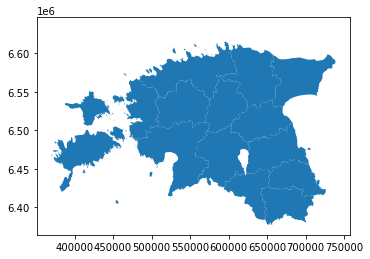

In [348]:
# read shp file
sfp = 'data\estonia_counties.shp'
est = gpd.read_file(sfp)

est.plot()
est.head()

In [349]:
# joining data to shp
est = est.merge(emig_data, left_on='nimi', right_on='to_fi_from')
est.to_file('data\est_to_fi_emigration.gpkg', driver='GPKG')


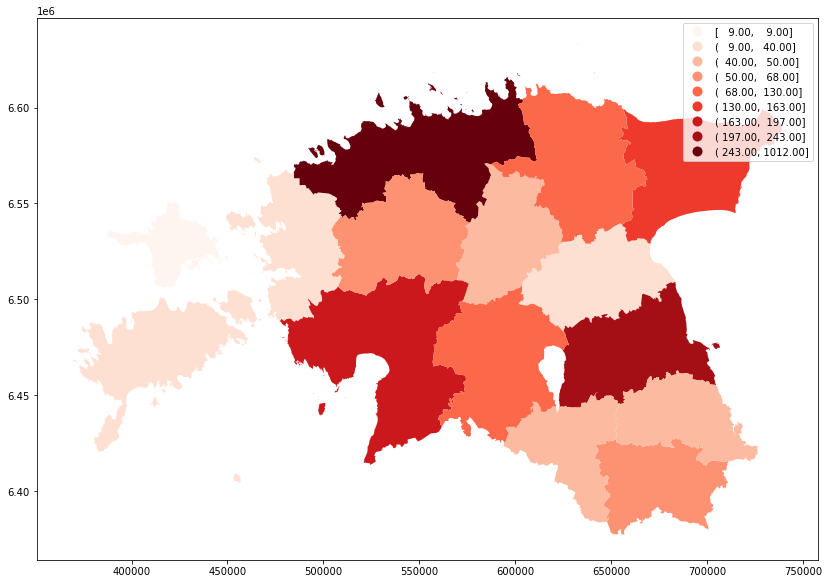

In [351]:
est.head()
ax= est.plot(figsize=[14,10], column='em_2019', scheme='Natural_Breaks', k=9, cmap='Reds', legend=True)

___________________

In [322]:
# read file
fp = r'data\Finland_immigration_fromEstonia_1990-2019.csv'
fi_data = pd.read_csv(fp, sep=',', encoding='Latin',skiprows=1)

fi_data.head()

,Year,Country of departure or arrival,Region,Total Total Immigration to Finland,Males Total Immigration to Finland,Females Total Immigration to Finland
0,1990,Estonia,WHOLE COUNTRY,0,0,0
1,1990,Estonia,MA1 MAINLAND FINLAND,0,0,0
2,1990,Estonia,MK01 Uusimaa,0,0,0
3,1990,Estonia,MK02 Southwest Finland,0,0,0
4,1990,Estonia,MK04 Satakunta,0,0,0


In [323]:
# erasing rows with non county data
fi_data = fi_data.loc[fi_data['Region']!='MA1 MAINLAND FINLAND']
fi_data = fi_data.loc[fi_data['Region']!='WHOLE COUNTRY']
fi_data = fi_data.loc[fi_data['Region']!='MA2 ÅLAND']

print(fi_data['Region'].nunique(), 'counties')
fi_data['name'] = [name[5:] for name in fi_data['Region']]
fi_data['code'] = [name[:5] for name in fi_data['Region']]
fi_data.head(21)

19 counties


,Year,Country of departure or arrival,Region,Total Total Immigration to Finland,Males Total Immigration to Finland,Females Total Immigration to Finland,name,code
2,1990,Estonia,MK01 Uusimaa,0,0,0,Uusimaa,MK01
3,1990,Estonia,MK02 Southwest Finland,0,0,0,Southwest Finland,MK02
4,1990,Estonia,MK04 Satakunta,0,0,0,Satakunta,MK04
5,1990,Estonia,MK05 Kanta-Häme,0,0,0,Kanta-Häme,MK05
6,1990,Estonia,MK06 Pirkanmaa,0,0,0,Pirkanmaa,MK06
7,1990,Estonia,MK07 Päijät-Häme,0,0,0,Päijät-Häme,MK07
8,1990,Estonia,MK08 Kymenlaakso,0,0,0,Kymenlaakso,MK08
9,1990,Estonia,MK09 South Karelia,0,0,0,South Karelia,MK09
10,1990,Estonia,MK10 South Savo,0,0,0,South Savo,MK10
11,1990,Estonia,MK11 North Savo,0,0,0,North Savo,MK11


In [324]:
fi_data = fi_data.rename(columns = {'Total Total Immigration to Finland': 'total', 
                                   'Males Total Immigration to Finland': 'males',
                                   'Females Total Immigration to Finland': 'females',
                                   'Country of departure or arrival': 'departure'})
fi_data.columns

Index(['Year', 'departure', 'Region', 'total', 'males', 'females', 'name',
       'code'],
      dtype='object')

In [325]:
# grouped by name
grouped=fi_data.groupby('name')

# new dataframe
imig_data = pd.DataFrame()

# iterating over groups
for key, group in grouped:
    
    # adding the name of the county
    imig_data.loc[key, 'from_est_to']= key
    
    # adding the code of the county
    imig_data.loc[key, 'code']= group['code'].unique()
    
    # adding column years as a list, and emigration as list
    imig_data.loc[key, ['im_'+str(y) for y in group['Year']]] = group['total'].to_list()
    
#     print(group)
    
imig_data

,from_est_to,code,im_1990,im_1991,im_1992,im_1993,im_1994,im_1995,im_1996,im_1997,...,im_2010,im_2011,im_2012,im_2013,im_2014,im_2015,im_2016,im_2017,im_2018,im_2019
Central Finland,Central Finland,MK13,0.0,30.0,80.0,95.0,42.0,37.0,31.0,31.0,...,60.0,78.0,77.0,67.0,38.0,39.0,26.0,23.0,37.0,23.0
Central Ostrobothnia,Central Ostrobothnia,MK16,0.0,15.0,24.0,9.0,3.0,8.0,3.0,1.0,...,30.0,40.0,14.0,23.0,27.0,10.0,9.0,8.0,7.0,5.0
Kainuu,Kainuu,MK18,0.0,6.0,14.0,3.0,1.0,2.0,3.0,3.0,...,10.0,8.0,12.0,11.0,11.0,19.0,6.0,10.0,4.0,8.0
Kanta-Häme,Kanta-Häme,MK05,0.0,33.0,110.0,77.0,36.0,74.0,36.0,35.0,...,78.0,122.0,154.0,167.0,103.0,57.0,50.0,45.0,33.0,37.0
Kymenlaakso,Kymenlaakso,MK08,0.0,43.0,55.0,27.0,34.0,15.0,18.0,20.0,...,145.0,140.0,183.0,150.0,145.0,68.0,48.0,26.0,37.0,13.0
Lapland,Lapland,MK19,0.0,10.0,15.0,15.0,13.0,5.0,7.0,11.0,...,29.0,23.0,23.0,47.0,20.0,26.0,17.0,19.0,23.0,15.0
North Karelia,North Karelia,MK12,0.0,15.0,33.0,23.0,4.0,13.0,10.0,5.0,...,32.0,24.0,40.0,18.0,35.0,21.0,7.0,7.0,10.0,7.0
North Ostrobothnia,North Ostrobothnia,MK17,0.0,20.0,74.0,32.0,30.0,16.0,13.0,16.0,...,42.0,46.0,37.0,52.0,46.0,32.0,31.0,31.0,28.0,24.0
North Savo,North Savo,MK11,0.0,12.0,67.0,35.0,25.0,24.0,13.0,13.0,...,73.0,93.0,130.0,90.0,65.0,43.0,22.0,31.0,27.0,28.0
Ostrobothnia,Ostrobothnia,MK15,0.0,6.0,33.0,28.0,4.0,13.0,11.0,13.0,...,65.0,90.0,94.0,106.0,92.0,40.0,22.0,32.0,32.0,18.0


In [326]:
imig_data.to_csv('data\imigration_from_estonia.csv')

,Fin_code,NUTS_NAME,eng_name,Fin_code,geometry
0,MK05,Kanta-Häme,Kanta-Häme,MK05,"POLYGON ((2795339.948 8584285.958, 2794878.702..."
1,MK07,Päijät-Häme,Päijät-Häme,MK07,"POLYGON ((2929376.408 8766890.314, 2929589.440..."
2,MK04,Satakunta,Satakunta,MK04,"MULTIPOLYGON (((2556840.444 8635762.651, 25557..."
3,MK14,Etelä-Pohjanmaa,South Ostrobothnia,MK14,"POLYGON ((2637936.804 9194121.430, 2638090.648..."
4,MK15,Pohjanmaa,Ostrobothnia,MK15,"MULTIPOLYGON (((2545536.785 9308791.885, 25460..."


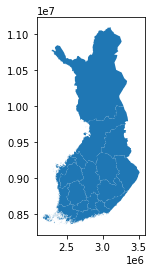

In [327]:
# read shp file
sfp = r'data\Shapefiles\nuts3_Finland_codes.shp'
fi = gpd.read_file(sfp)

fi = fi[['Fin_code','NUTS_NAME', 'eng_name','Fin_code', 'geometry']]

fi.plot()
fi.head()

In [328]:
print(fi['eng_name'].unique(), len(fi['eng_name']))
print('_______')
print(imig_data['from_est_to'].unique(), len(imig_data['from_est_to']))

['Kanta-Häme' 'Päijät-Häme' 'Satakunta' 'South Ostrobothnia'
 'Ostrobothnia' 'Kymenlaakso' 'Pirkanmaa' 'Uusimaa' 'Southwest Finland'
 'Åland' 'Central Finland' 'Central Ostrobothnia' 'North Ostrobothnia'
 'South Karelia' 'South Savo' 'North Karelia' 'Kainuu' 'North Savo'
 'Lapland'] 19
_______
['Central Finland' 'Central Ostrobothnia' 'Kainuu' 'Kanta-Häme'
 'Kymenlaakso' 'Lapland' 'North Karelia' 'North Ostrobothnia' 'North Savo'
 'Ostrobothnia' 'Pirkanmaa' 'Päijät-Häme' 'Satakunta' 'South Karelia'
 'South Ostrobothnia' 'South Savo' 'Southwest Finland' 'Uusimaa' 'Åland'] 19


In [329]:
# joining data to shp
fi = fi.merge(imig_data, left_on='eng_name', right_on='from_est_to')
fi.to_file(r'data\fi_from_est_imigration.gpkg', driver='GPKG')
fi.head()

,Fin_code,NUTS_NAME,eng_name,Fin_code,geometry,from_est_to,code,im_1990,im_1991,im_1992,...,im_2010,im_2011,im_2012,im_2013,im_2014,im_2015,im_2016,im_2017,im_2018,im_2019
0,MK05,Kanta-Häme,Kanta-Häme,MK05,"POLYGON ((2795339.948 8584285.958, 2794878.702...",Kanta-Häme,MK05,0.0,33.0,110.0,...,78.0,122.0,154.0,167.0,103.0,57.0,50.0,45.0,33.0,37.0
1,MK07,Päijät-Häme,Päijät-Häme,MK07,"POLYGON ((2929376.408 8766890.314, 2929589.440...",Päijät-Häme,MK07,0.0,46.0,92.0,...,103.0,107.0,187.0,145.0,147.0,92.0,81.0,70.0,63.0,58.0
2,MK04,Satakunta,Satakunta,MK04,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",Satakunta,MK04,0.0,41.0,89.0,...,140.0,162.0,195.0,195.0,144.0,77.0,71.0,40.0,43.0,38.0
3,MK14,Etelä-Pohjanmaa,South Ostrobothnia,MK14,"POLYGON ((2637936.804 9194121.430, 2638090.648...",South Ostrobothnia,MK14,0.0,22.0,51.0,...,110.0,123.0,147.0,121.0,64.0,47.0,20.0,37.0,28.0,29.0
4,MK15,Pohjanmaa,Ostrobothnia,MK15,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",Ostrobothnia,MK15,0.0,6.0,33.0,...,65.0,90.0,94.0,106.0,92.0,40.0,22.0,32.0,32.0,18.0


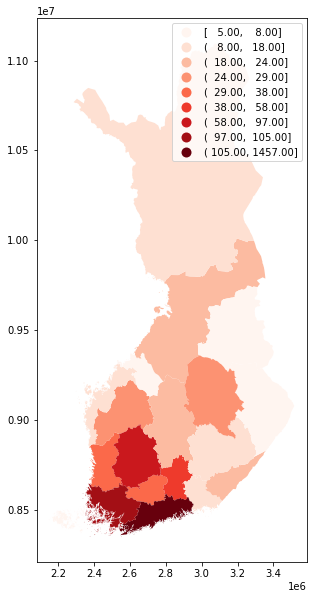

In [332]:
fi.head()
ax= fi.plot(figsize=[14,10], column='im_2019', scheme='Natural_Breaks', k=9, cmap='Reds', legend=True)